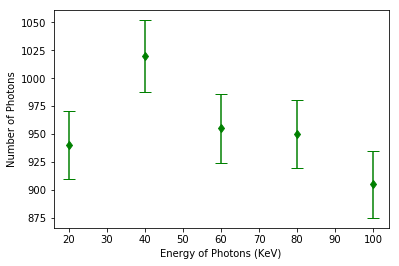

In [61]:
import matplotlib.pyplot as plt
import numpy as np 
import math as math

x = np.arange(20, 120, 20)
#I used the data from the first slide
y = np.array([940, 1020, 955, 950, 905]) 
q = np.sqrt(y)

#Graphing the Fake Data

ax1 = plt.subplot() 
plt.plot(linestyle='None')
ax1.errorbar(x, y, q, linestyle='None', marker='d', color='green', capsize=6) 
plt.xlabel('Energy of Photons (KeV)')
plt.ylabel('Number of Photons')
plt.show()


[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.
   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.
   96.   97.   98. -700.]


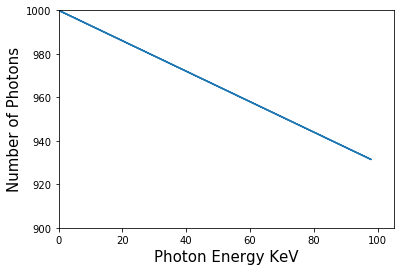

In [108]:
#Creating the true line of Photon emission rates for data sample

nbPoints = 100 
eMax = 100 
eMin = 0 
delta=(eMax - eMin)/(nbPoints - 1) 
data = np.empty(nbPoints) 
for iE in range(nbPoints-1): 
    data[iE] = eMin + iE*delta 
    
print data


nbPhotons = np.empty(nbPoints)
#Creating a graph of a linear function 
param = [-.7, 1000] 
 
def myLinearFunction(param, x): 
    y=np.empty(len(x))
    y=param[0]*x + param[1]
    return y 

ax1=plt.subplot()
nbPhotonLinear = myLinearFunction(param, data)
plt.plot(data, nbPhotonLinear)
ax1.set_xlim([0, 105]) 
ax1.set_ylim([900, 1000])
plt.xlabel('Photon Energy KeV', size=15)
plt.ylabel('Number of Photons', size=15)
plt.show()

In [105]:
#Generate Fake Data
#Use guassian for each data point to generate data, do it manually and use numpy function 

#Find Y values at specific X and then calcualte sigma for those values 
nbDataPoints = 5
def getNbPhotons(x): 
    NbPhotons = -.7*x + 1000 
    return NbPhotons

def getSigma(y): 
    sigma = np.sqrt(y) 
    return sigma 

#Loop to create an array of NbPhotons at Specific Energy Levels 
j = 0 #for iteration
step = 20 #seperation between data points
arrayPhotons = np.zeros(nbDataPoints) 
for i in range(nbDataPoints): 
    j = j + step
    arrayPhotons[i] = getNbPhotons(j)

#Loop to create an array of sigma values for the distribution 
j = 0 #for iteration
arraySigma = np.zeros(nbDataPoints)
for i in range(nbDataPoints): 
    j= j + step
    arraySigma[i] = getSigma(getNbPhotons(j)) 

print arrayPhotons
print arraySigma 

#Pull Random values from each data point to generate fake data
fakeData = np.zeros(nbDataPoints)
for i in range(nbDataPoints): 
     fakeData[i] = np.random.normal(arrayPhotons[i], arraySigma[i]) 

print fakeData

[ 986.  972.  958.  944.  930.]
[ 31.40063694  31.17691454  30.95157508  30.72458299  30.49590136]
[ 1000.55627836   970.73115138   986.28131585   954.46699066   905.34005277]


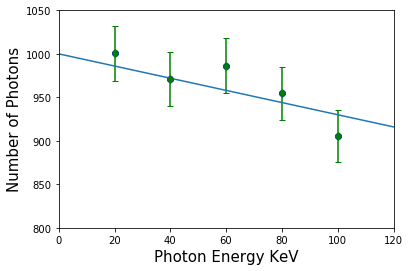

In [106]:
#Plot Fake Data over the intial curve
param = [-.7, 1000] 
#x is declared at the beginning of the code
yData = fakeData

sigmaFakeData=np.sqrt(yData)

def myLinearFunction(param, x): 
    y=np.empty(len(x))
    y=param[0]*x + param[1]
    return y 

ax2 = plt.subplot()
nbPhotonLinear = myLinearFunction(param, data)
plt.plot(data, nbPhotonLinear)
plt.xlabel('Photon Energy KeV', size=15)
plt.ylabel('Number of Photons', size=15) 
plt.scatter(x, yData, color='blue') 
ax2.errorbar(x, yData, sigmaFakeData, linestyle='None', marker='d', color='green', capsize=3)
ax2.set_xlim([0, 120])
ax2.set_ylim([800,1050])
plt.show()
plt.show() 


In [ ]:
#Do the 1-Dimensional Fitting for the X^2 Value
